In [1]:
import csv
import math
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import numpy as np
import os
%matplotlib inline
import pandas as pd
import sklearn
import shap
import time
from sklearn.tree import DecisionTreeClassifier
import xgboost
import shap


from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from shap import TreeExplainer
from shap import summary_plot

In [2]:
import json
with open('GA_output_ET.json', 'r') as fp:
    feature_list = json.load(fp)

In [3]:
import warnings
warnings.filterwarnings("ignore")

# create binary datasets

In [4]:
def folder(f_name): #this function creates a folder.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")

In [5]:
folder("results")

In [6]:
def find_the_way(path,file_format):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                files_add.append(os.path.join(r, file))  
    return files_add

files_add=find_the_way("./N/",".csv")
files_add

[]

In [7]:


a={'./csvs\\dos-synflooding-1-dec.pcap_Flow.csv':"SYN",
'./csvs\\mirai-httpflooding-4-dec.pcap_Flow.csv':"HTTP",
'./csvs\\mirai-ackflooding-4-dec.pcap_Flow.csv':"ACK",
 './csvs\\mirai-udpflooding-4-dec.pcap_Flow.csv':"UDP",
 './csvs\\mitm-arpspoofing-6-dec.pcap_Flow.csv':"ARP",
'./csvs\\scan-hostport-3-dec.pcap_Flow.csv':"SP",
 './csvs\\mirai-hostbruteforce-5-dec.pcap_Flow.csv':"BF"}

b={"SYN":[ './csvs\\dos-synflooding-1-dec.pcap_Flow.csv', './csvs\\dos-synflooding-2-dec.pcap_Flow.csv',],
"HTTP":['./csvs\\mirai-httpflooding-4-dec.pcap_Flow.csv', './csvs\\mirai-httpflooding-1-dec.pcap_Flow.csv'],
"ACK":['./csvs\\mirai-ackflooding-4-dec.pcap_Flow.csv','./csvs\\mirai-ackflooding-1-dec.pcap_Flow.csv'],
"UDP":[ './csvs\\mirai-udpflooding-4-dec.pcap_Flow.csv','./csvs\\mirai-udpflooding-1-dec.pcap_Flow.csv'],
"ARP":[ './csvs\\mitm-arpspoofing-6-dec.pcap_Flow.csv', './csvs\\mitm-arpspoofing-4-dec.pcap_Flow.csv'],
"SP":['./csvs\\scan-hostport-3-dec.pcap_Flow.csv','./csvs\\scan-hostport-4-dec.pcap_Flow.csv'],
"BF":[ './csvs\\mirai-hostbruteforce-5-dec.pcap_Flow.csv','./csvs\\mirai-hostbruteforce-3-dec.pcap_Flow.csv']}

c={"SYN":[ './csvs/dos-synflooding-1-dec.pcap_Flow.csv', './csvs/small_Edge_IIoT_DDoS_TCP_SYN_Flood_Attacks_00000_20211124180237.pcap_Flow.csv',],
"HTTP":['./csvs/mirai-httpflooding-4-dec.pcap_Flow.csv', './csvs/NetatmoCamHTTPFlood_1.pcap_Flow.csv'],
"ACK":['./csvs/mirai-ackflooding-4-dec.pcap_Flow.csv','./csvs/NetatmoCamTCPFlood_3.pcap_Flow.csv'],
"UDP":[ './csvs/mirai-udpflooding-4-dec.pcap_Flow.csv','./csvs/Bot_IoT_UDP_DDoS_00001.pcap_Flow.csv'],
"ARP":[ './csvs/mitm-arpspoofing-6-dec.pcap_Flow.csv', './csvs/kitsune_ARP.csv'],
"SP":['./csvs/scan-hostport-3-dec.pcap_Flow.csv','./csvs/scan-hostport-6-dec.pcap_Flow.csv'],
"BF":[ './csvs/mirai-hostbruteforce-5-dec.pcap_Flow.csv','./csvs/AmcrestCamBruteForce_1.pcap_Flow.csv']}

In [8]:

final={}
for i in a:
    print(i)
    final[i]=f"{a[i]}1"
    final[b[a[i]][1]]=f"{a[i]}2"
    final[c[a[i]][1]]=f"{a[i]}3"

./csvs\dos-synflooding-1-dec.pcap_Flow.csv
./csvs\mirai-httpflooding-4-dec.pcap_Flow.csv
./csvs\mirai-ackflooding-4-dec.pcap_Flow.csv
./csvs\mirai-udpflooding-4-dec.pcap_Flow.csv
./csvs\mitm-arpspoofing-6-dec.pcap_Flow.csv
./csvs\scan-hostport-3-dec.pcap_Flow.csv
./csvs\mirai-hostbruteforce-5-dec.pcap_Flow.csv


In [9]:
final

{'./csvs\\dos-synflooding-1-dec.pcap_Flow.csv': 'SYN1',
 './csvs\\dos-synflooding-2-dec.pcap_Flow.csv': 'SYN2',
 './csvs/small_Edge_IIoT_DDoS_TCP_SYN_Flood_Attacks_00000_20211124180237.pcap_Flow.csv': 'SYN3',
 './csvs\\mirai-httpflooding-4-dec.pcap_Flow.csv': 'HTTP1',
 './csvs\\mirai-httpflooding-1-dec.pcap_Flow.csv': 'HTTP2',
 './csvs/NetatmoCamHTTPFlood_1.pcap_Flow.csv': 'HTTP3',
 './csvs\\mirai-ackflooding-4-dec.pcap_Flow.csv': 'ACK1',
 './csvs\\mirai-ackflooding-1-dec.pcap_Flow.csv': 'ACK2',
 './csvs/NetatmoCamTCPFlood_3.pcap_Flow.csv': 'ACK3',
 './csvs\\mirai-udpflooding-4-dec.pcap_Flow.csv': 'UDP1',
 './csvs\\mirai-udpflooding-1-dec.pcap_Flow.csv': 'UDP2',
 './csvs/Bot_IoT_UDP_DDoS_00001.pcap_Flow.csv': 'UDP3',
 './csvs\\mitm-arpspoofing-6-dec.pcap_Flow.csv': 'ARP1',
 './csvs\\mitm-arpspoofing-4-dec.pcap_Flow.csv': 'ARP2',
 './csvs/kitsune_ARP.csv': 'ARP3',
 './csvs\\scan-hostport-3-dec.pcap_Flow.csv': 'SP1',
 './csvs\\scan-hostport-4-dec.pcap_Flow.csv': 'SP2',
 './csvs/scan-host

In [10]:
file_list={'./csvs\\dos-synflooding-1-dec.pcap_Flow.csv': 'SYN1',
 './csvs\\dos-synflooding-2-dec.pcap_Flow.csv': 'SYN2',
 './csvs/small_Edge_IIoT_DDoS_TCP_SYN_Flood_Attacks_00000_20211124180237.pcap_Flow.csv': 'SYN3',
 './csvs\\mirai-httpflooding-4-dec.pcap_Flow.csv': 'HTTP1',
 './csvs\\mirai-httpflooding-1-dec.pcap_Flow.csv': 'HTTP2',
 './csvs/NetatmoCamHTTPFlood_1.pcap_Flow.csv': 'HTTP3',
 './csvs\\mirai-ackflooding-4-dec.pcap_Flow.csv': 'ACK1',
 './csvs\\mirai-ackflooding-1-dec.pcap_Flow.csv': 'ACK2',
 './csvs/NetatmoCamTCPFlood_3.pcap_Flow.csv': 'ACK3',
 './csvs\\mirai-udpflooding-4-dec.pcap_Flow.csv': 'UDP1',
 './csvs\\mirai-udpflooding-1-dec.pcap_Flow.csv': 'UDP2',
 './csvs/Bot_IoT_UDP_DDoS_00001.pcap_Flow.csv': 'UDP3',
 './csvs\\mitm-arpspoofing-6-dec.pcap_Flow.csv': 'ARP1',
 './csvs\\mitm-arpspoofing-4-dec.pcap_Flow.csv': 'ARP2',
 './csvs/kitsune_ARP.csv': 'ARP3',
 './csvs\\scan-hostport-3-dec.pcap_Flow.csv': 'SP1',
 './csvs\\scan-hostport-4-dec.pcap_Flow.csv': 'SP2',
 './csvs/scan-hostport-6-dec.pcap_Flow.csv': 'SP3',
 './csvs\\mirai-hostbruteforce-5-dec.pcap_Flow.csv': 'BF1',
 './csvs\\mirai-hostbruteforce-3-dec.pcap_Flow.csv': 'BF2',
 './csvs/AmcrestCamBruteForce_1.pcap_Flow.csv': 'BF3'}

./csvs\dos-synflooding-1-dec.pcap_Flow.csv


 94%|=================== | 15850/16923 [00:17<00:01]       

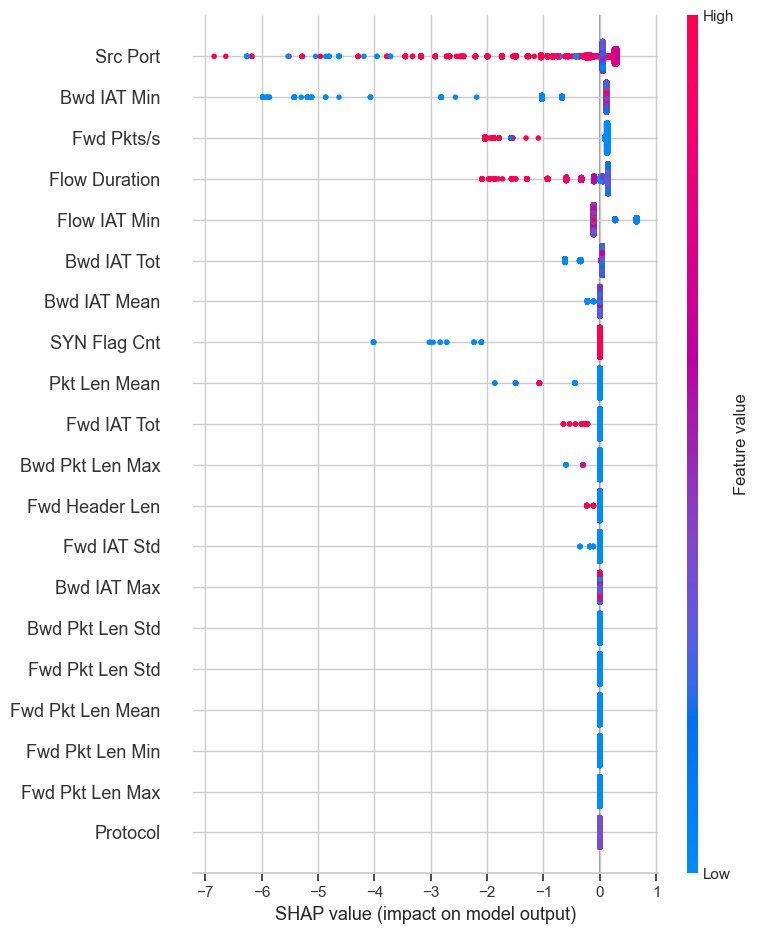

./csvs\dos-synflooding-2-dec.pcap_Flow.csv


 96%|=================== | 14653/15212 [00:17<00:00]       

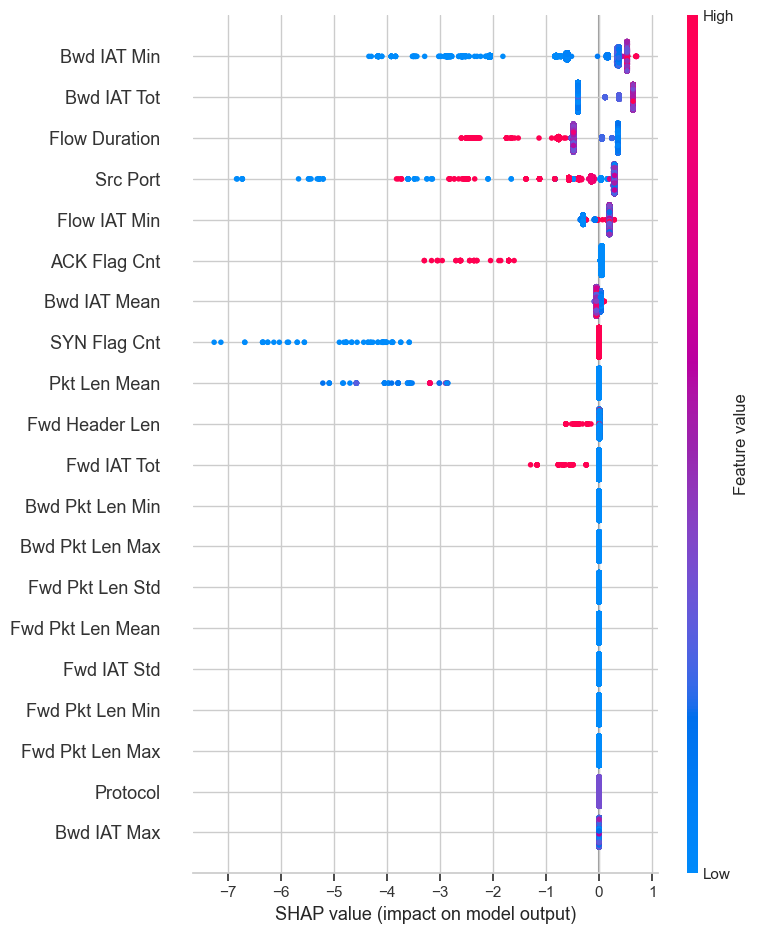

./csvs/small_Edge_IIoT_DDoS_TCP_SYN_Flood_Attacks_00000_20211124180237.pcap_Flow.csv


100%|===================| 432130/433128 [02:49<00:00]        

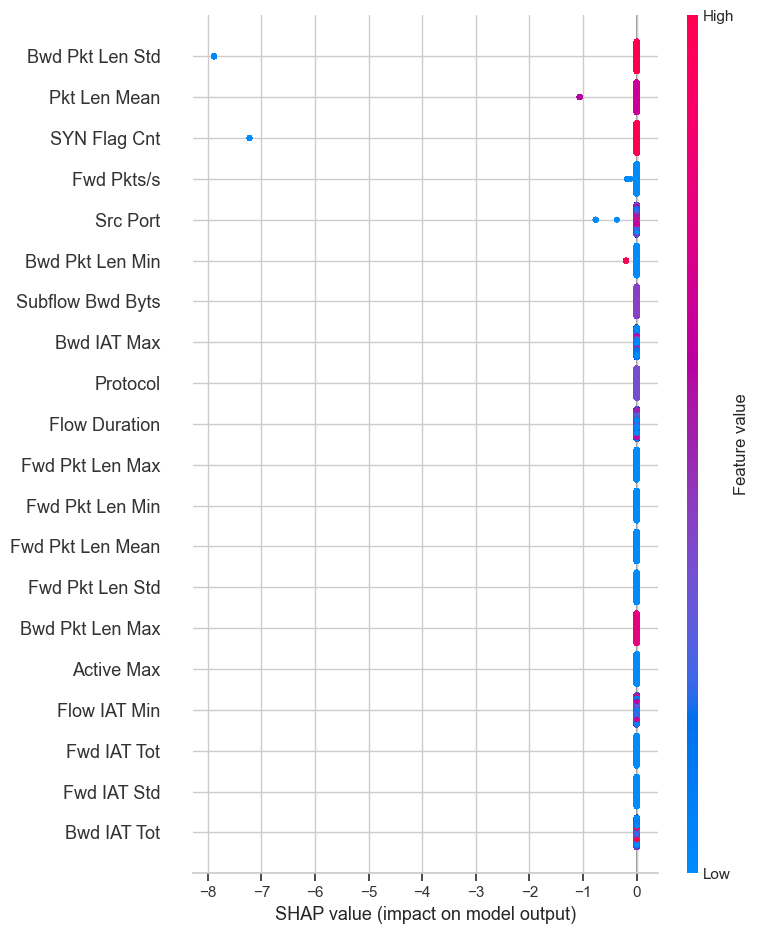

./csvs\mirai-httpflooding-4-dec.pcap_Flow.csv


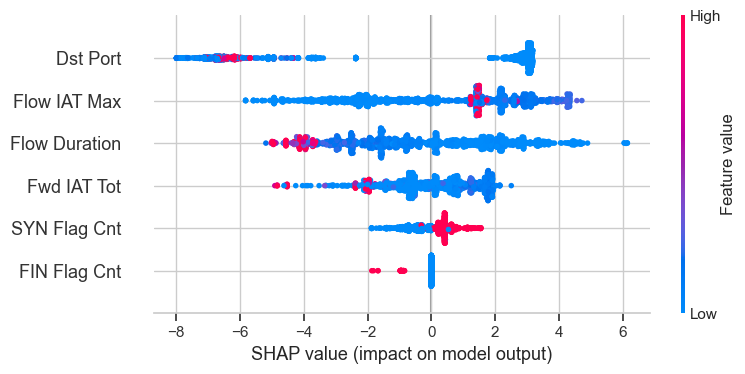

./csvs\mirai-httpflooding-1-dec.pcap_Flow.csv


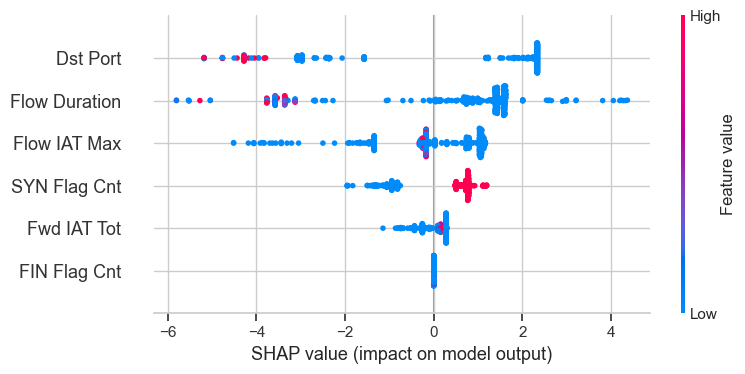

./csvs/NetatmoCamHTTPFlood_1.pcap_Flow.csv


 96%|=================== | 47254/49333 [00:17<00:00]       

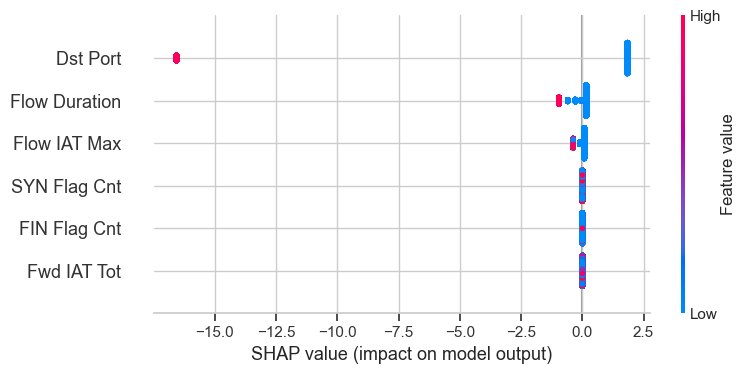

./csvs\mirai-ackflooding-4-dec.pcap_Flow.csv


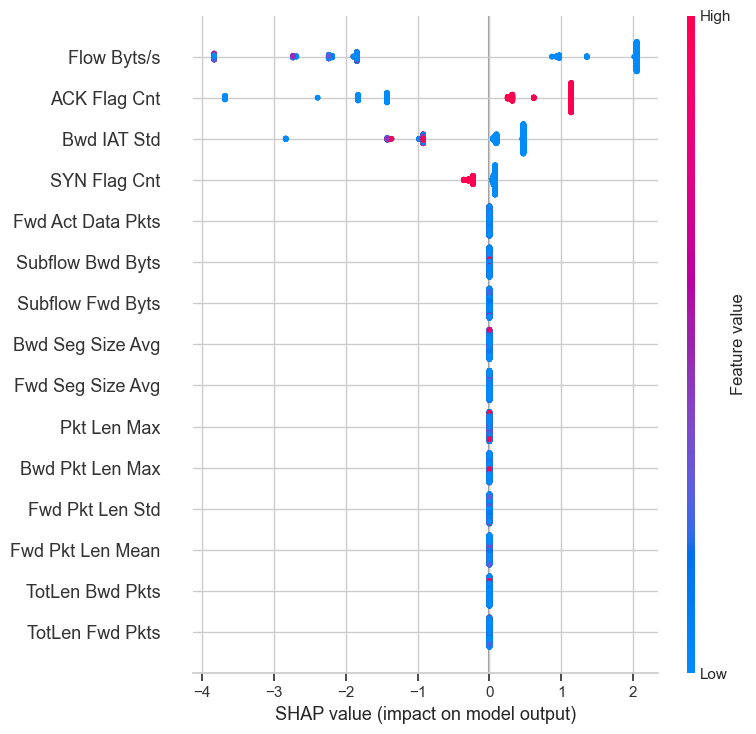

./csvs\mirai-ackflooding-1-dec.pcap_Flow.csv


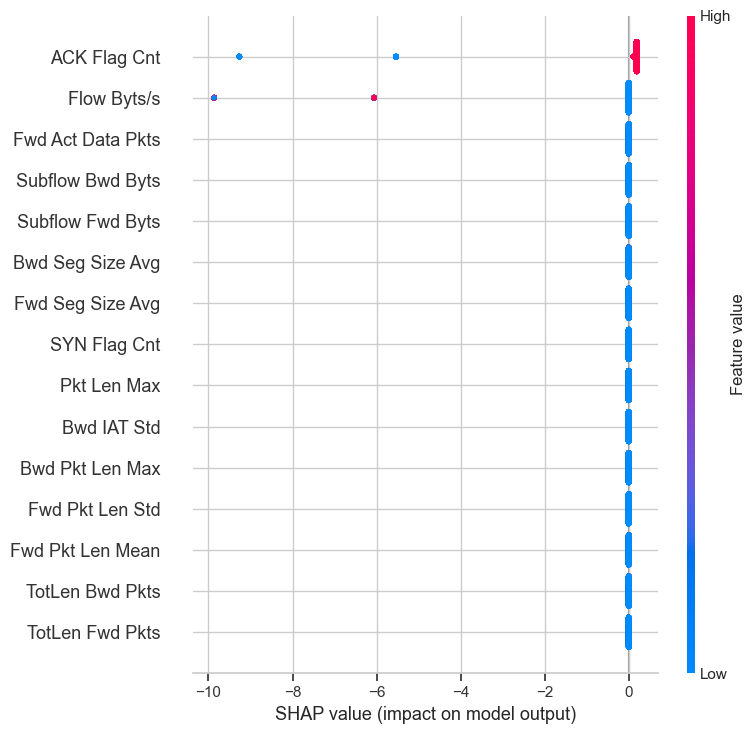

./csvs/NetatmoCamTCPFlood_3.pcap_Flow.csv


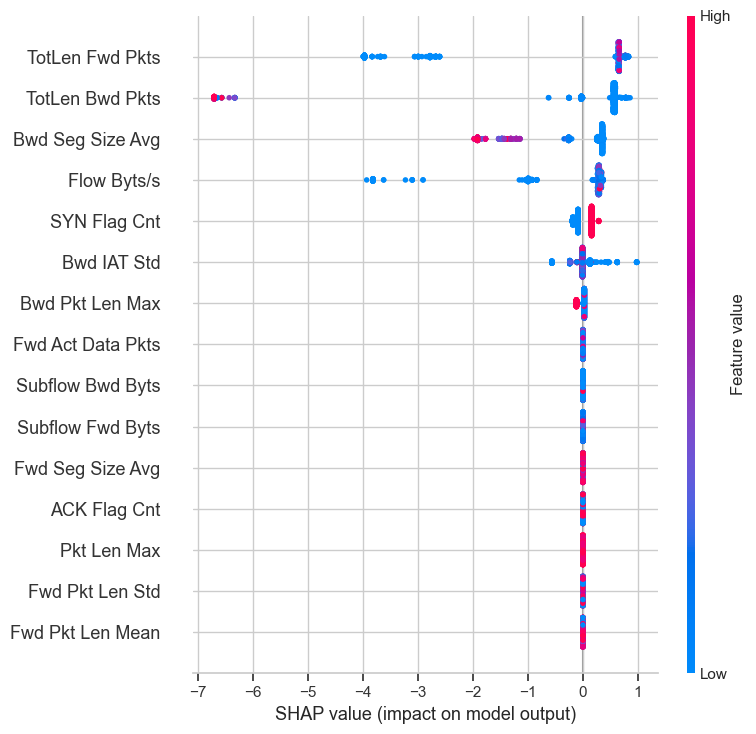

./csvs\mirai-udpflooding-4-dec.pcap_Flow.csv


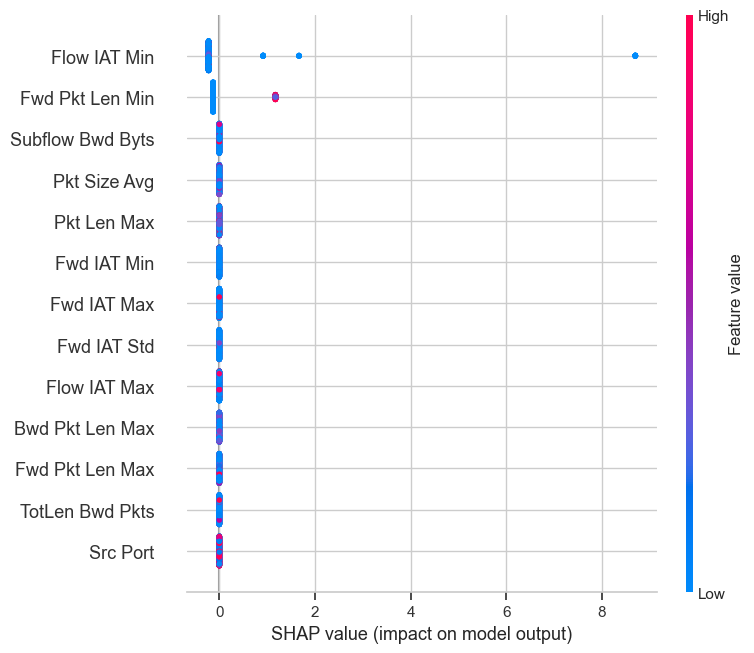

./csvs\mirai-udpflooding-1-dec.pcap_Flow.csv


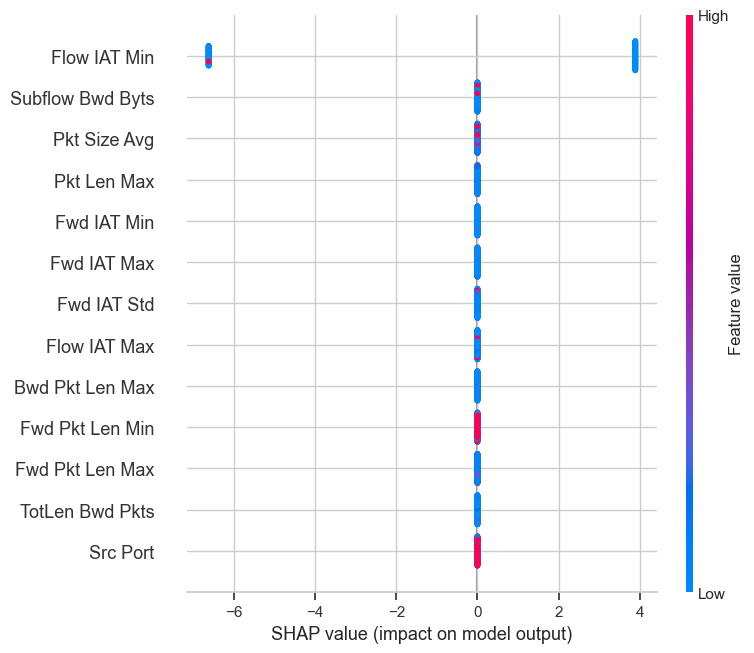

./csvs/Bot_IoT_UDP_DDoS_00001.pcap_Flow.csv


 99%|===================| 322143/324820 [01:47<00:00]        

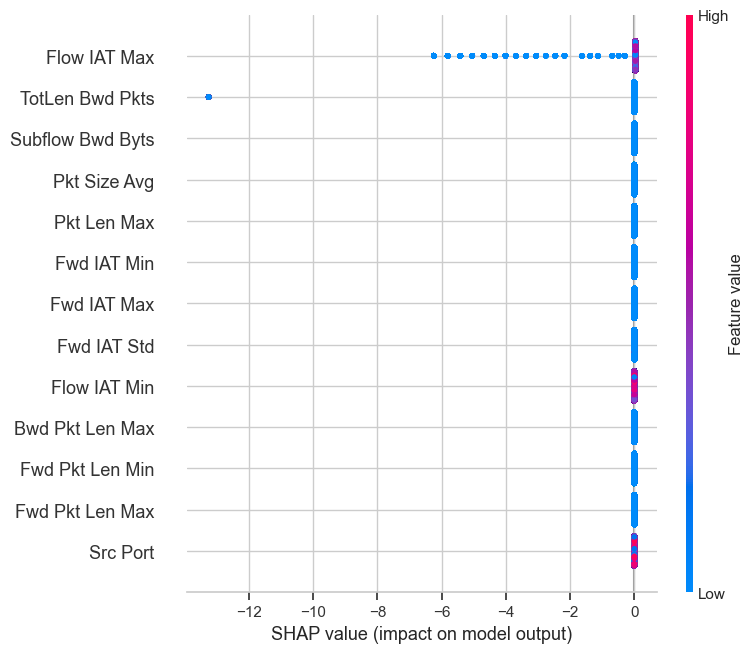

./csvs\mitm-arpspoofing-6-dec.pcap_Flow.csv


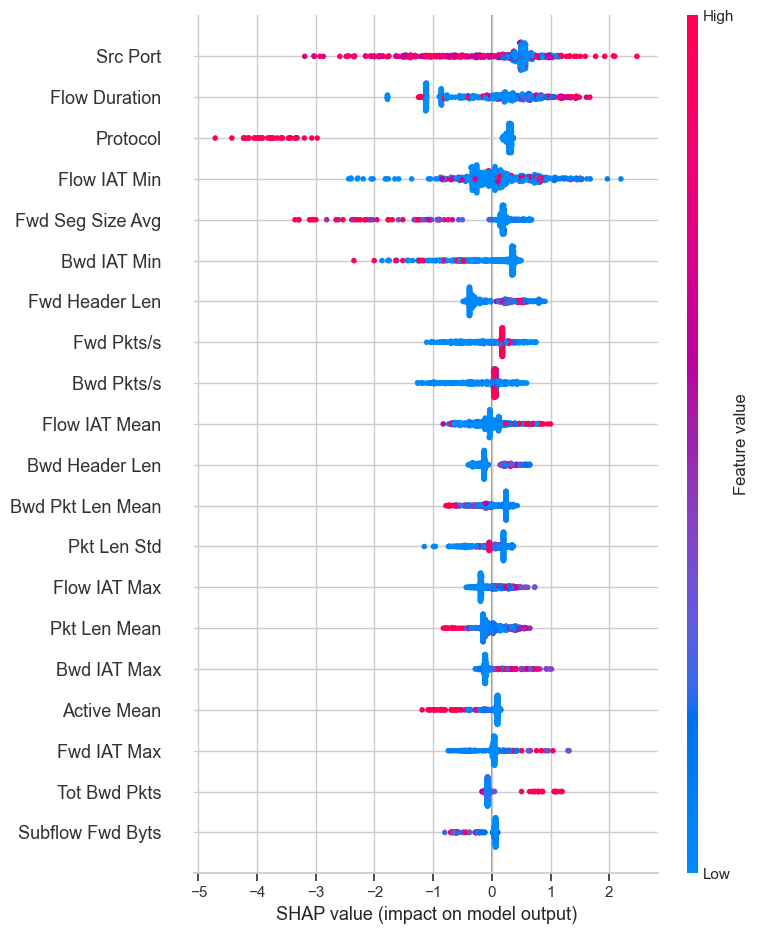

./csvs\mitm-arpspoofing-4-dec.pcap_Flow.csv


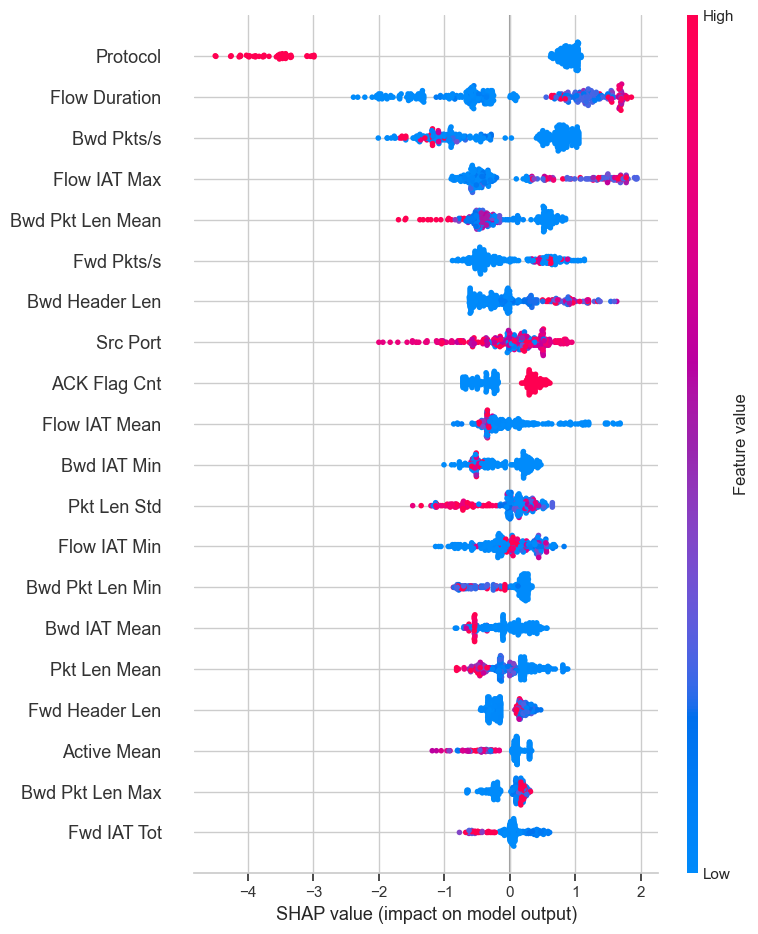

./csvs/kitsune_ARP.csv


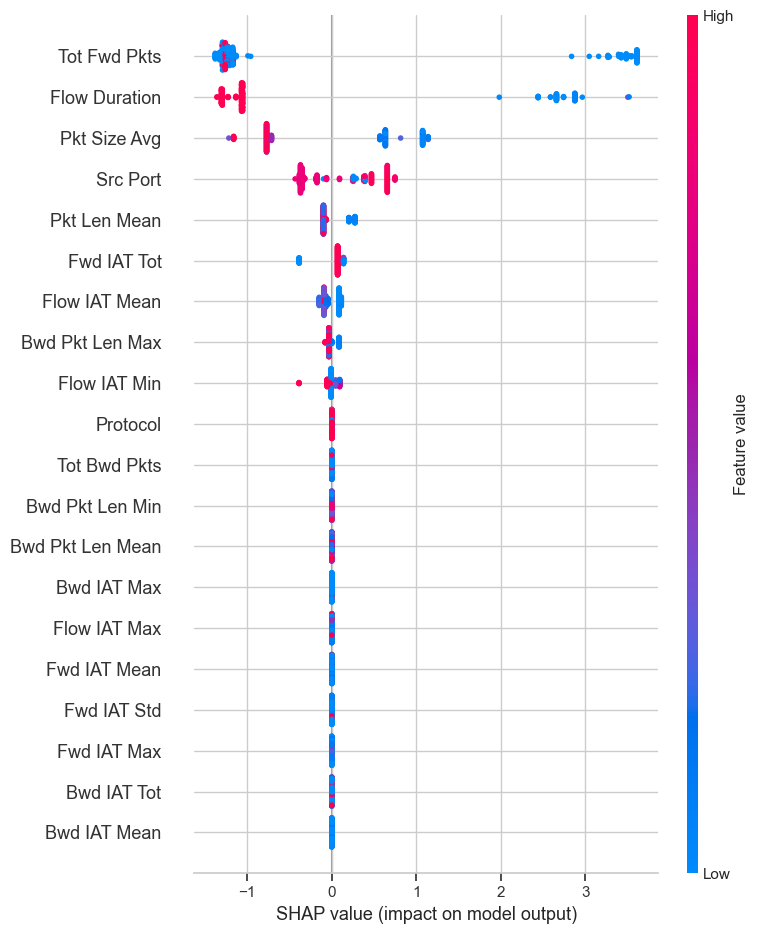

./csvs\scan-hostport-3-dec.pcap_Flow.csv


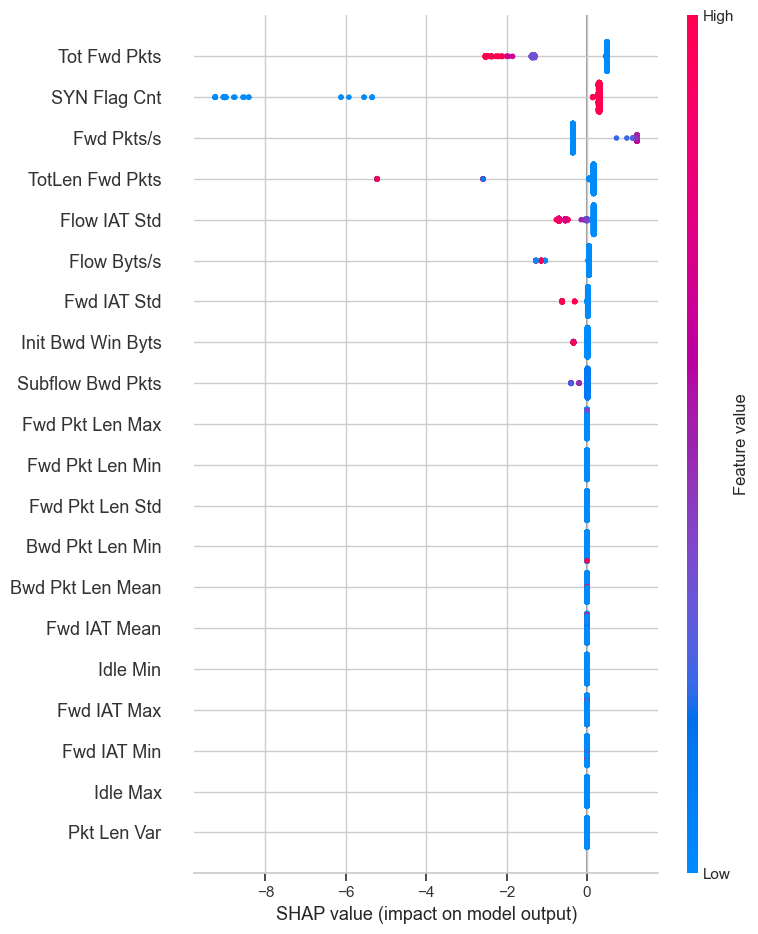

./csvs\scan-hostport-4-dec.pcap_Flow.csv


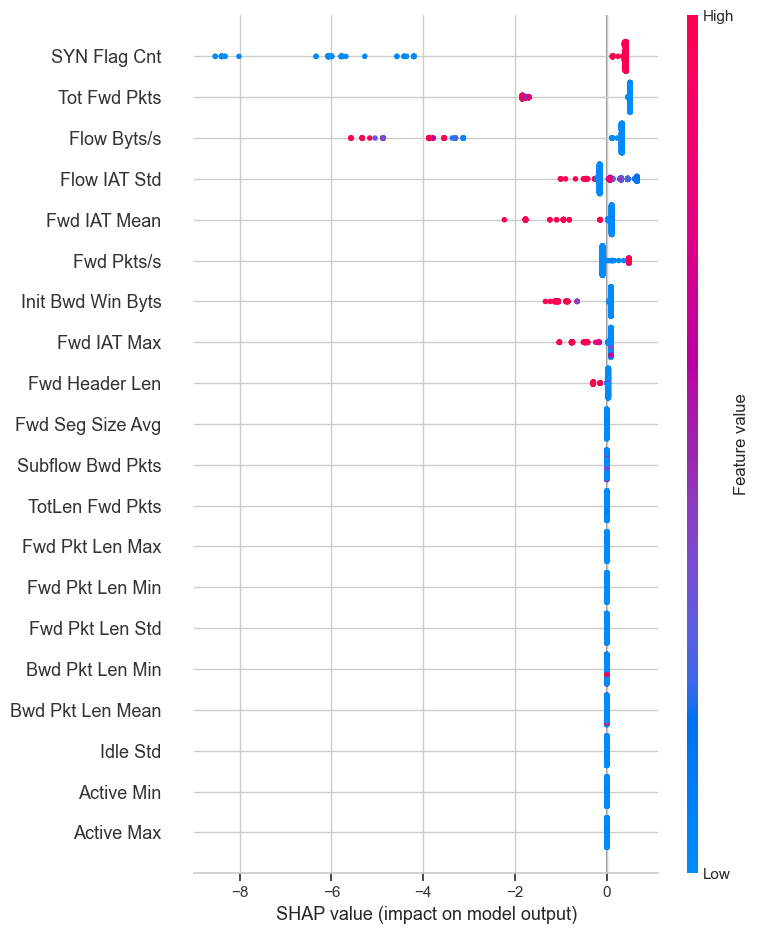

./csvs/scan-hostport-6-dec.pcap_Flow.csv


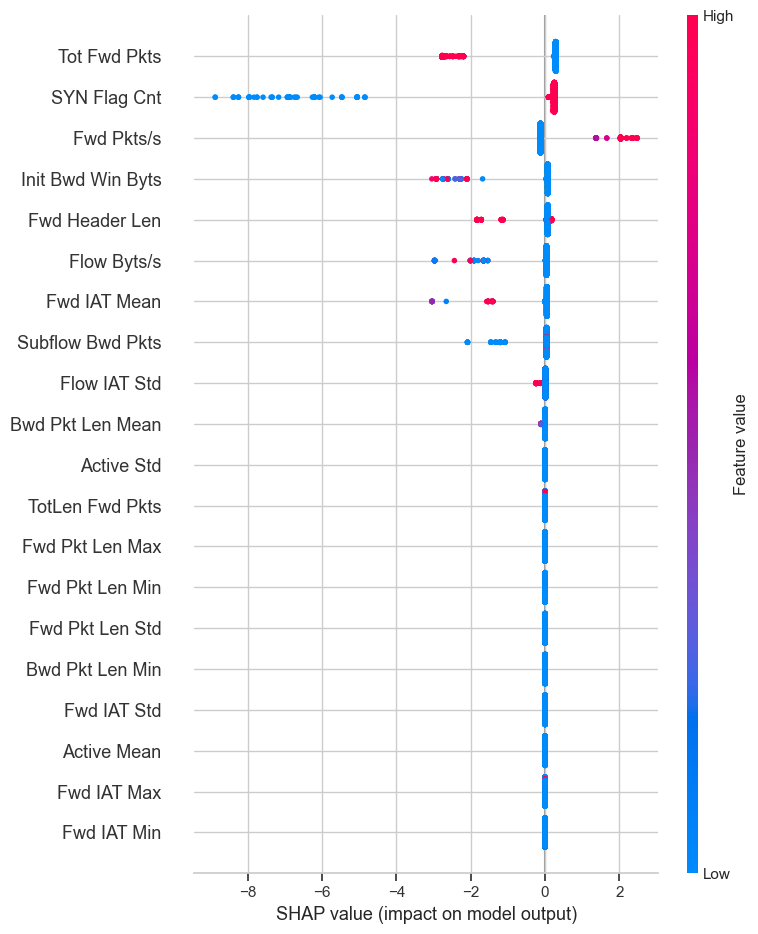

./csvs\mirai-hostbruteforce-5-dec.pcap_Flow.csv


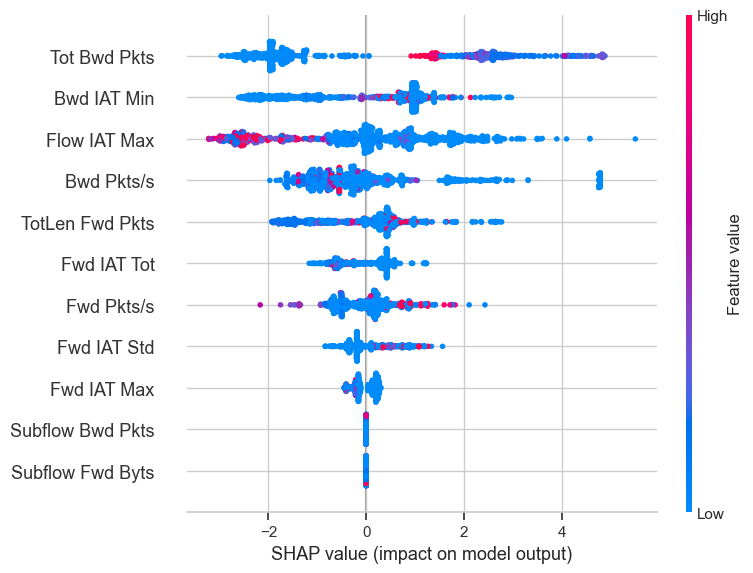

./csvs\mirai-hostbruteforce-3-dec.pcap_Flow.csv


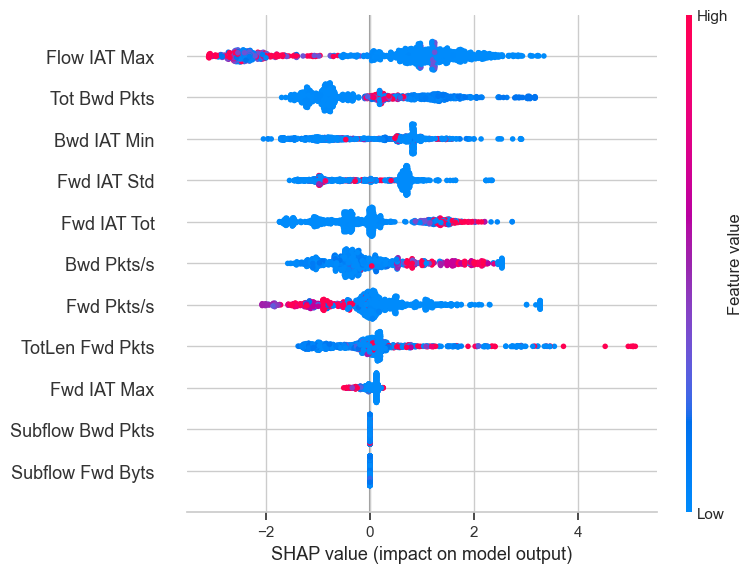

./csvs/AmcrestCamBruteForce_1.pcap_Flow.csv


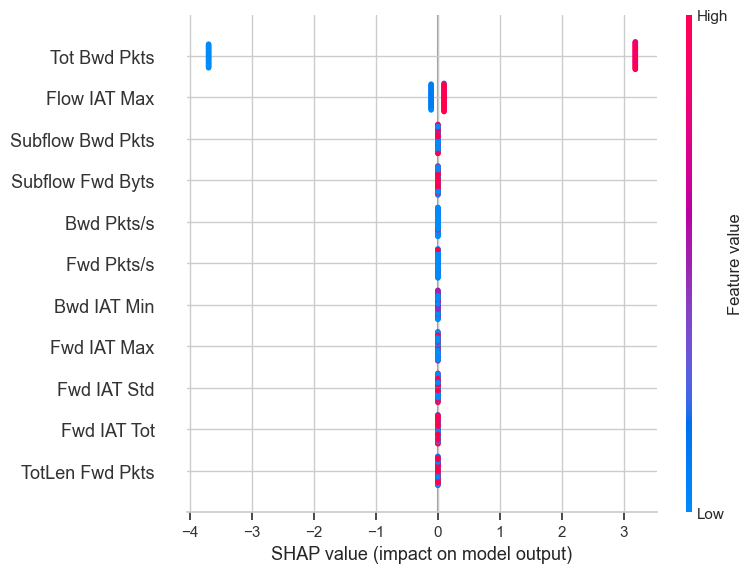

In [11]:
for csv in file_list:
    print(csv)
    cols=feature_list[file_list[csv][:-1]]
    df = pd.read_csv(csv,usecols=cols)#,header=None )
    df=df.fillna(0)
    X_train =df[df.columns[0:-1]]
    #X_train=np.array(X_train)
    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
    y_train=df[df.columns[-1]].cat.codes  




    target_names=sorted(list(df[df.columns[-1]].unique()))

    target_names=["Benign",file_list[csv][:-1]]

    model =  xgboost.XGBClassifier()

    model.fit(X_train, y_train)
    explainer = shap.Explainer(model, X_train)
    try:shap_values = explainer(X_train)
    except:shap_values = explainer(X_train,check_additivity=False)
    shap.summary_plot(shap_values, X_train, show=False)
    plt.savefig(f'{file_list[csv]}.pdf', format='pdf', dpi=1200, bbox_inches='tight')
    plt.show()
